In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.drop(columns=["CustomerID", "Gender"], inplace=True)

In [5]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: ylabel='Annual Income (k$)'>

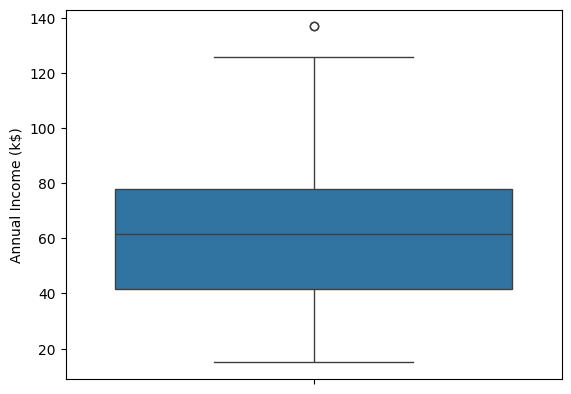

In [9]:
sns.boxplot(df["Annual Income (k$)"])

<Axes: ylabel='Spending Score (1-100)'>

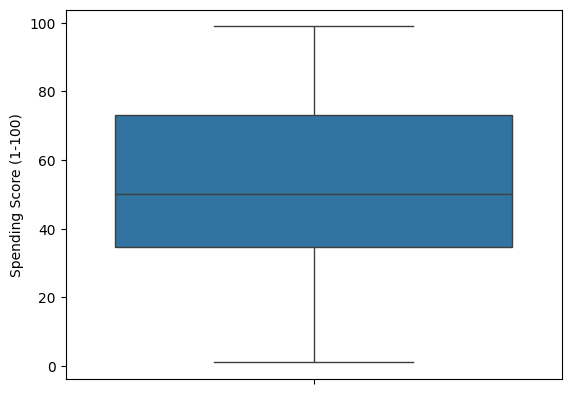

In [10]:
sns.boxplot(df["Spending Score (1-100)"])

<Axes: ylabel='Annual Income (k$)'>

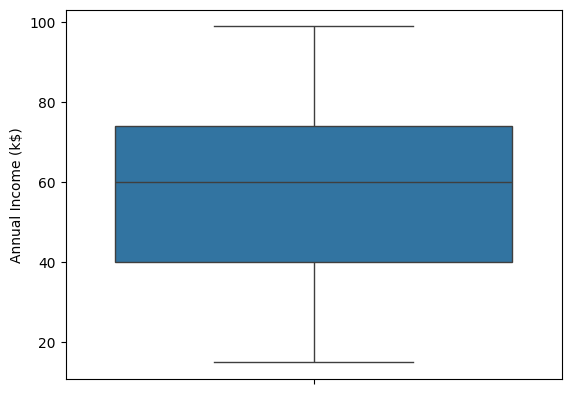

In [11]:
df = df[~(df["Annual Income (k$)"] > 100)]

sns.boxplot(df["Annual Income (k$)"])

In [12]:
# cari duplikasi data

In [13]:
for col in df.columns:

    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df.head()
df['Annual Income (k$)'].min()

0.0

In [14]:
class Kmeans():
    def __init__(self, n_cluster=2, max_iteration=100):
        self.n_cluster = n_cluster
        self.max_iteration = max_iteration
        self.centroids = None
        self.inertia = 0
        self.label = None

    def fit(self, x):
        self.centroids = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_cluster, x.shape[1]))                     

        for iteration in range(self.max_iteration):
            self.label = []
            distance_cluster = []

            for item in x:
                distance = np.sqrt(np.sum((item - self.centroids)**2, axis=1))
                distance_cluster.append(np.min(distance))
                cluster = np.argmin(distance)
                self.label.append(cluster)

            self.label = np.array(self.label)
            distance_cluster = np.array(distance_cluster)
            groups = []


            for i in range(self.n_cluster):
                groups.append(np.argwhere(self.label == i))

            
            new_centroids = []
            sum_inertia = []

            for i, indices in enumerate(groups):

                if len(indices) == 0:
                    new_centroids.append(self.centroids[i])
                else:
                    sum_inertia.append(np.sum(distance_cluster[indices]))
                    new_centroids.append(np.mean(x[indices], axis=0)[0])

            self.inertia = np.mean(np.array(sum_inertia)**2)

            if np.max(np.abs(np.array(new_centroids) - self.centroids)) < 0.0001:
                break
            else:
                self.centroids = new_centroids


In [15]:
model = Kmeans(n_cluster=2, max_iteration=300)

model.fit(df.to_numpy())

In [16]:
model.inertia

1030.726380689458

In [17]:
wcss = []

for k in range(1, 11):
    model = Kmeans(n_cluster=k, max_iteration=200)
    model.fit(df.to_numpy())

    wcss.append(model.inertia)

In [18]:
wcss

[6448.14664412334,
 1029.9899096754,
 424.7168597659066,
 206.3810505108271,
 86.43726004150624,
 79.35390248903884,
 22.628999853321577,
 22.360867014863512,
 16.35153648765635,
 17.24312595877938]

Text(0, 0.5, 'wcss')

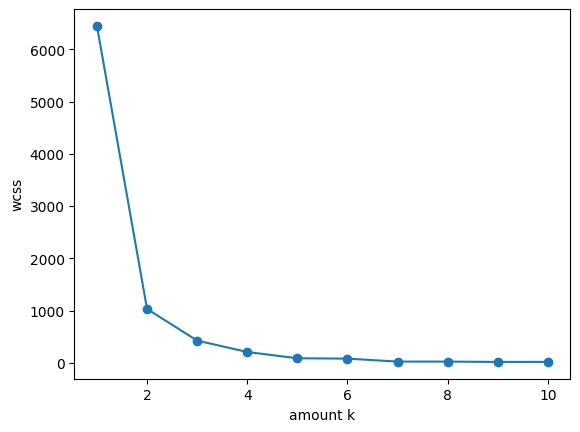

In [19]:
plt.plot(np.arange(1, 11), wcss, marker="o")
plt.xlabel("amount k")
plt.ylabel("wcss")


In [20]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [21]:
kmean = Kmeans(n_cluster=4)

kmean.fit(df.to_numpy())


Text(0.5, 0, 'Spending Score (1-100)')

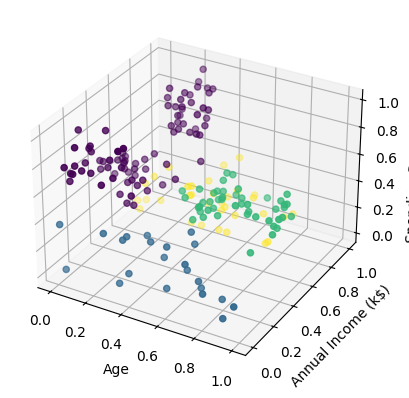

In [22]:
ax = plt.axes(projection='3d')

ax.scatter3D(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=kmean.label)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

In [23]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(df)

KMeans(n_clusters=4)

Text(0.5, 0, 'Spending Score (1-100)')

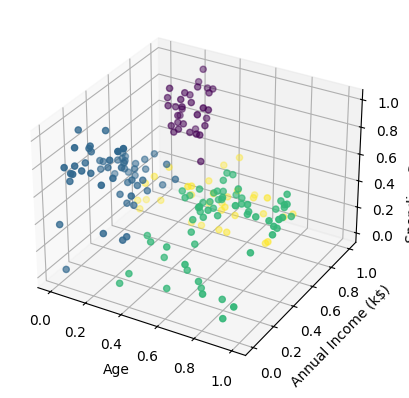

In [24]:
ax = plt.axes(projection='3d')

ax.scatter3D(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=model.labels_)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

In [25]:
print("mine ", kmean.centroids)
print("scikit ", model.cluster_centers_)

mine  [array([0.19547511, 0.49761905, 0.70936375]), array([0.50611888, 0.12824675, 0.19666048]), array([0.73035117, 0.4673913 , 0.49023957]), array([0.41666667, 0.76479076, 0.19418677])]
scikit  [[0.28554779 0.77417027 0.8283859 ]
 [0.14304993 0.29761905 0.60508414]
 [0.68986569 0.37906274 0.40314221]
 [0.42599068 0.77164502 0.19264069]]
